In [16]:
# 신경망이 학습할 수 있도록 도와주는 지표 : 손실 함수
# 학습의 목표는 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것

# 이미지 분석 : 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법 : 컴퓨터 비전
# 신경망은 이미지를 '있는 그대로' 학습함. 사람의 생각이 개입되지 않음.

# 오버피팅(과적합) : 한 데이터셋에만 지나치게 최적화된 상태 이 과적합을 피하는 것이 머신러닝의 주요한 과제임.


### 오차제곱합
$$ E = \frac1 2  \sum_k (y_k = t_k)^2 $$

In [2]:
# 오차제곱합은 가장 많이 쓰이는 손실 함수이다.
import numpy as np

def sse(y, t):
    return 0.5 * np.sum((y-t) ** 2) 

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sse(np.array(y), np.array(t))

0.09750000000000003

## 교차 엔트로피 오차

$$ E = -\sum_k t_k  \log y_k $$
* $ y_k $는 신경망의 출력, $ t_k $ 는 정답 레이블

In [5]:
# 로그함수에서도 보이다싶이 x가 1일 때 y는 0이 되고, x가 0에 가까워질수록 y의 값은 점점 작아짐.
# 식도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가 그 출력이 1일 때 0이 됨.
import numpy as np

def cee(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))  # 아주 작은 값인 delta를 더하는 이유는 np.log()가 0이 되지 않기 위함.

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee(np.array(y), np.array(t))

0.510825457099338

## 모든 데이터에 대한 교차 엔트로피 오차

$$ E = -\frac1 N \sum_n \sum_k t_nk \log y_nk  $$

* 마지막에 N으로 나누어 정규화함. 이는 '평균 손실 함수'를 구하는 것임.


In [72]:
import sys, os
sys.path.append("/Users/yimjaekyoon/Library/CloudStorage/OneDrive-개인/ScratchDL")
import numpy as np
from data.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [36]:
# 이 훈련 데이터에서 무작위로 10장만 빼내려면?
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0이상 train_size 미만의 수 중에서 무작위로 batch_size 개를 골라냄
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

t_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### 배치용 교차 엔트로치 오차 구현하기

In [37]:
# 미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차(cce)는 ?
batch_size = 10

def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)    
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# 손실함수를 사용해야 하는 이유 : 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개 변수 값을 찾음.
# 이 때 매개변수의 미분(기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서싷 갱신하는 과정을 반복함.

# 정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문.



## 수치 미분

### 미분

In [3]:
# 미분 구현 - 나쁜 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

# 개선점 1
# h는 매우 작은 값으로 대입하고 싶지만 이 방식은 반올림 오차 문제를 일으킴. : 너무 작은 값을 이용하면 컴퓨터로 계산하는데 문제가 된다.

# 개선점 2
# f의 차분에 관한 것 : (x + h)와 x 사이의 함수 f의 차분을 계산하고 있지만 이 계산에는 오차가 있다.
# 진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만 위 함수에서의 미분은 (x + h)와 x 사이의 기울기에 해당함.(전방 차분)

In [4]:
# 개선점을 반영 - 오차를 줄이기 위해 (x + h)와 (x - h)일 때의 함수 f의 차분을 구함(중심 차분)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

### 수치 미분의 예

$ y = 0.01 x^2 + 0.1 x  $

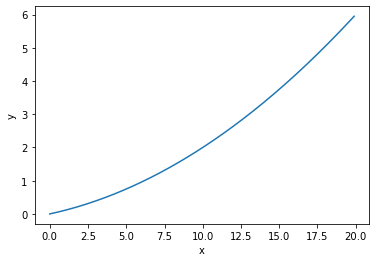

In [5]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만듬
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [6]:
# x = 5, 10일때 값 미분해보자
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분

$ f(x_0, x_1) = x^2_0 + x^2_1 $

In [7]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

# 어느 변수에 대한 미분이냐를 구별해야 함.
# 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 함.

def function_tmp1(x0):
    return x0 ** 2 + 4 ** 2
print(numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):
    return 3 ** 2 + x1 ** 2
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 기울기

In [8]:
# x0과 x1의 편미분을 동시에 계산하고 싶다면?
# 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 한다.
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 모든 원소가 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [9]:
# 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향임.

### 경사 하강법

* 일반적인 머신러닝 문제에서 손실 함수는 매우 복잡하다.
* 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다.
* 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사 하강법이다.
* 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기 이지만 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지 보장할 수는 없다.
* 경사 하강법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 또 이동한 곳에서 마찬가지로 기울기를 구하고 그 기울어진 방향으로 나아가기를 반복함.

$$ x_0 = x_0 - \eta \frac {\partial f} {\partial x_0} $$
$$ x_1 = x_1 - \eta \frac {\partial f} {\partial x_1} $$



* $ \eta $ 는 신경망 학습에서 학습률 이라고 한다. 이 학습률 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다.

In [11]:
import numpy as np

def grad_descent(f, init_x, lr = 0.01, step_num = 100):  
    # f : 최적화하려는 함수, init_x : 초깃값 lr : 학습률, step_num : 반복 횟수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)  # 함수의 기울기
        x -= lr * grad
    return x


def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
grad_descent(function_2, init_x = init_x, lr = 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [12]:
# 학습률이 너무 크면?
init_x = np.array([-3.0, 4.0])
print(grad_descent(function_2, init_x = init_x, lr = 10, step_num=100))

# 학습률이 너무 작으면?
init_x = np.array([-3.0, 4.0])
print(grad_descent(function_2, init_x = init_x, lr = 1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 신경망에서의 기울기

* 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.


In [31]:
import sys, os
sys.path.append("/Users/yimjaekyoon/Library/CloudStorage/OneDrive-개인/ScratchDL")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-2.24267981  0.4063238  -1.87266483]
 [-0.56307679  0.78803347  0.05478087]]


In [13]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))  # 최댓값의 index

t = np.array([0,0,1])
print(net.loss(x, t))


[-0.12311563  0.36006762  0.49144329]
2
0.8828446797292666


In [15]:
# 기울기를 구해보자
# def f(W):
#     return net.loss(x, t)

# lambda 문법을 써보자
f = lambda w : net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

# w11을 h만큼 늘리면 손실 함수의 값은 0.2h만큼 증가함.
# w23을 h만큼 늘리면 손실 함수의 값은 0.5h만큼 감소함.

# -> 손실함수를 줄인다는 관점에서는 w23은 양의 방향으로 갱신하고 w11은 음의 방향으로 갱신해야 함.
# -> 한 번에 갱신되는 양에는 w23이 w11보다 크게 기여하고 있음.

[[ 0.13422615  0.21761105 -0.3518372 ]
 [ 0.20133922  0.32641658 -0.5277558 ]]


### 2층 신경망 클래스 구현하기

In [73]:
import sys, os
sys.path.append("/Users/yimjaekyoon/Library/CloudStorage/OneDrive-개인/ScratchDL")
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    # 초기화 수행
    def __init__(self, input_size, hidden_size, output_size, weight_init_std =  0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측을 수행
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실 함수의 값을 구함
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도를 구함
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 가중치 매개변수의 기울기를 구함
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    
    # n_g의 성능 개선판
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num  # ????
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


### 미니배치 학습 구현

In [74]:
import numpy as np
from data.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

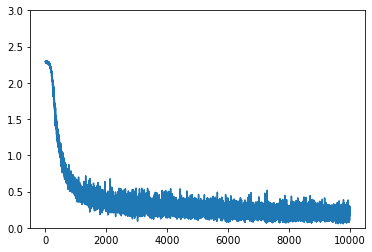

In [85]:
# 그래프로 나타내보기
import matplotlib.pyplot as plt

x = np.arange(0.0, 10000.0, 1.0)
y = train_loss_list
plt.plot(x,y)
plt.ylim(0, 3.0) # y축의 범위
plt.show()

### 시험 데이터로 평가하기

* 신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야 한다.
* 다른 말로 오버피팅을 일으키지 않는지 확인해야 한다.

In [86]:
import numpy as np
from data.mnist import load_mnist
from two_layer_net import TwoLayerNet
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 100000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7917666666666666, 0.7967
train acc, test acc | 0.8775, 0.882
train acc, test acc | 0.8967, 0.9011
train acc, test acc | 0.9075333333333333, 0.9096
train acc, test acc | 0.91345, 0.9157
train acc, test acc | 0.9183, 0.921
train acc, test acc | 0.9225666666666666, 0.9258
train acc, test acc | 0.9259, 0.9267
train acc, test acc | 0.92985, 0.932
train acc, test acc | 0.93285, 0.9339
train acc, test acc | 0.9352833333333334, 0.935
train acc, test acc | 0.9379, 0.9384
train acc, test acc | 0.9403333333333334, 0.9415
train acc, test acc | 0.9423666666666667, 0.943
train acc, test acc | 0.9439166666666666, 0.9445
train acc, test acc | 0.9467833333333333, 0.946
train acc, test acc | 0.9484, 0.9473
train acc, test acc | 0.9491166666666667, 0.9493
train acc, test acc | 0.9515, 0.9497
train acc, test acc | 0.9520333333333333, 0.9511
train acc, test acc | 0.9535, 0.9516
train acc, test acc | 0.9548, 0.9517
train acc, test acc

In [ ]:
#